In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn import preprocessing
#from sklearn.grid_search import GridSearchCV

Задание 1 (+1). Загрузить titanic.csv. Нарисовать диаграммы (гистограммы/круговые/...), по которым можно будет сравнить 
1) вероятность выжить для мужчин и женщин, 
2) вероятность выжить для пассажиров разных социально-экономических классов (Pclass), 
3) стоимость билета в зависимости от социально-экономического класса. 

In [111]:
# Загружаем файл
file = pd.read_csv('titanic.csv', sep=',')
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Выживышие. Распределение по полу. Таблица. 
 
 Sex       female  male
Survived              
0             81   468
1            233   109


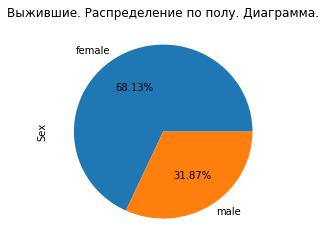

In [132]:
# Вероятность выжить для мужчин и женщин.

# Без процентов. 
# Таблица.
survived_sex = file.groupby(['Sex', 'Survived']).size().unstack()
print('Выживышие. Распределение по полу. Таблица.', '\n', '\n', survived_sex.T)

# Круговая диаграмма
plt.figure(figsize=(4, 4))
sex_survived = file.Sex[file.Survived == 1].value_counts()
#sex_died = file.Sex[file.Survived == 0].value_counts()
sex_survived.plot.pie(autopct='%.2f%%')
plt.title('Выжившие. Распределение по полу. Диаграмма.')
plt.show()


Как видно из диаграммы, количество выживших женщин значительно превышает выживших мужчин (68% на 32%). Возможно, это связано с тем, что мужчины в первую очередь спасали женщин. Но хочу заметить по данным из таблицы, общее число женщин меньше, чем общее число мужчин.

Выживышие. Распределение по классу и полу. Таблица.
Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47


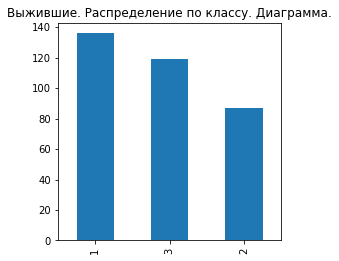

In [136]:
# В ероятность выжить для пассажиров разных социально-экономических классов.
# Без процентов. 
# Таблица.
survived_class_sex = file.groupby(['Sex', 'Survived', 'Pclass',]).size().unstack()
print('Выживышие. Распределение по классу и полу. Таблица.')
print(survived_class_sex)

# Гистограмма лучше будет отображать данные в этом случае
plt.figure(figsize=(4, 4))
class_survived = file.Pclass[file.Survived == 1].value_counts()
class_survived.plot(kind='bar')
plt.title('Выжившие. Распределение по классу. Диаграмма.')
plt.show()


Как видно из диаграммы, выжившее количество людей второго класса значительно меньше двух других (от общего числа людей, а не от кол-ва людей по классу). Для меня странно, почему это не 3 класс, как можно было бы предположить? Для людей первого класса было удобнее выбираться из кают, и они были выше всех, то есть затопление пришло к ним в последнюю очередь, а к тому времени многие свои каюты уже покинули. Что касается третьего класса, может быть, как люди, столкнувшиеся с водой в первую очередь, они начали эвакуироваться. Тогда в самой плохой ситуации оказались люди из 2 класса.

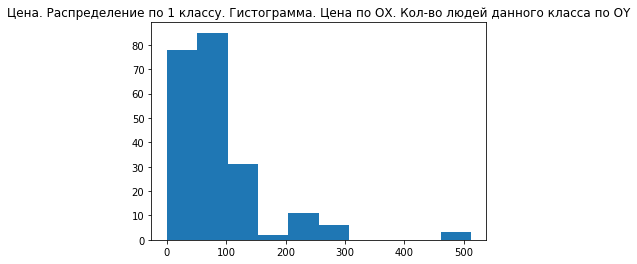

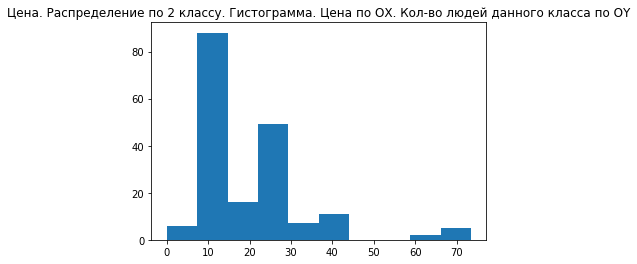

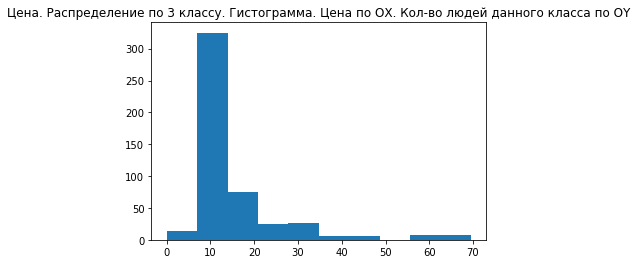

In [114]:
# Cтоимость билета в зависимости от социально-экономического класса

# Записываем зависимости в переменные
file.pclass = file['Pclass']
file.fare = file['Fare']
Class_1 = file.fare[file.pclass==1]
Class_2 = file.fare[file.pclass==2]
Class_3 = file.fare[file.pclass==3]

# Гистограмма, показывающая распределение цены в 1 классе
plt.hist(Class_1)
plt.title('Цена. Распределение по 1 классу. Гистограмма. Цена по OX. Кол-во людей данного класса по OY')
plt.show()
# Гистограмма, показывающая распределение цены во 2 классе
plt.hist(Class_2)
plt.title('Цена. Распределение по 2 классу. Гистограмма. Цена по OX. Кол-во людей данного класса по OY')
plt.show()
# Гистограмма, показывающая распределение цены в 3 классе
plt.hist(Class_3)
plt.title('Цена. Распределение по 3 классу. Гистограмма. Цена по OX. Кол-во людей данного класса по OY')
plt.show()


Ценовая категория билетов для 1 класса в районе 100-150, но есть и очень дорогие билеты, например, за 500.
2 класс в районе 10-40, 3 класс 10-20.

Задание 2 (+2). А теперь нарисуем два предиктора на одной диаграмме. 
1) Нарисовать гистограмму, описывающую среднюю вероятность выжить в зависимости от пола и соц. статуса. 

Например, это может быть гистограмма с тремя группами столбцов (разделение по соц.статусу), в которой высота столбца соответствует среднему числу выживших, а цвет столбца обозначает пол пассажиров. Снова интерпретировать результаты (Например, какова вероятность выжить женщине из первого класса?). Записать любые два утверждения в виде формул (нужно вспомнить, что такое совместная и/или условная вероятность).

In [115]:
survived_class_sex

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

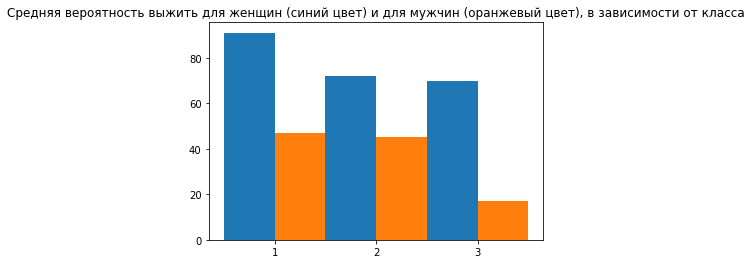

In [116]:
# Перед тем, как рисовать гистограмму, нам нужно посчитать среднюю вероятность (выжить для каждого из полов в каждом из классов)

file_male = file.Pclass[file.Sex == 'male'][file.Survived == 1].value_counts()
file_female = file.Pclass[file.Sex == 'female'][file.Survived == 1].value_counts()

# Сама гистограмма
width = 0.50
locs = np.arange(1, len(file_female)+1)
plt.bar(locs, file_female, width=width)
plt.bar(locs+width, file_male, width=width)
plt.xticks(locs + 0.5*width, locs)
plt.title('Средняя вероятность выжить для женщин (синий цвет) и для мужчин (оранжевый цвет), в зависимости от класса')
plt.show()

Мы видим, что выживших женщин гораздо больше, чем мужчин, в любом случае. Количество выживших мужин 3 класса значительно меньше их представителей в 1 и 2 классах. У женщин первого класса самая высокая вероятность выжить.

Формулы:
Вероятность выжить для женщин первого класса больше, чем для женщин 3 класса. 

P(survived|female, 1) > P(survived|female, 3)

Вероятность выжить у мужчин меньше, чем у женщин.

P(survived,male) < P(survived,female)

Задание 3 (+2). Почистите данные так, как считаете нужным (не забывайте про коварную переменную Sex; постарайтесь не удалять строки). Extra: сможете ли вы использовать не 4 столбца, а больше? 
Например, кажется, что если ребёнок ехал с братом/сестрой, то их не разлучат, а посадят вместе в шлюпку, и они выживут...

In [117]:
# Будем использовать 5 столбцов.
data = pd.DataFrame(file, columns=['Fare', 'Age', 'Sex', 'Pclass', 'Survived'])

# Коварная переменна Sex. Будет лучше, если пол будет числовым значением, а не номинальным. Женщина = 0, мужчина = 1.
data['Sex'] = data['Sex'].map({'female': 0, 'male':1}).astype(int)

# Возраст часто не указан, поэтому заменим недостающую информацию на среднее по возрасту.
data.fillna(data['Age'].mean(skipna=True), inplace=True)

# Чтобы проверить в следующем задании, как данные человека влияют на его смерть, отделим данные (класс, цену билета, возраст и пол) 
# от конечного результата
human_data = ['Sex','Pclass', 'Age', 'Fare'] 
h_data = data[human_data]
result = data['Survived']

In [118]:
data

,Fare,Age,Sex,Pclass,Survived
0,7.2500,22.000000,1,3,0
1,71.2833,38.000000,0,1,1
2,7.9250,26.000000,0,3,1
3,53.1000,35.000000,0,1,1
4,8.0500,35.000000,1,3,0
5,8.4583,29.699118,1,3,0
6,51.8625,54.000000,1,1,0
7,21.0750,2.000000,1,3,0
8,11.1333,27.000000,0,3,1
9,30.0708,14.000000,0,2,1


In [119]:
#h_data

In [120]:
#result

Задание 4 (+2). Разделить данные на обучающую и проверочную выборки (или использовать кросс-валидацию). Будем строить дерево решений. 

In [121]:
# делим данные на train и test в соотношении 30:70
h_data_train, h_data_test, result_train, result_test = train_test_split(h_data, result, test_size=0.3)

Мне кажется, логически, что самые важные параметры, влияющие на смерть человека, это пол и класс. Как следует из анализа графиков выше. Но мы можем посмотреть на важность через DecisionTreeClassifier


In [156]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(h_data_train, result_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [157]:
# Создам модель Decision Tree с лучшим параметром (min_samples_split) и выведу classification report и график-дерево
scores = []
for t in range(2, 100):
    decision_tree = DecisionTreeClassifier(min_samples_split=t)
    decision_tree.fit(h_data_train, result_train)
    result_predicted = decision_tree.predict(h_data_test)
    scores.append(f1_score(result_test, result_predicted))
    importance = pd.Series(decision_tree.feature_importances_, index=human_data)
print(classification_report(result_test, result_predicted))
print(importance)


             precision    recall  f1-score   support

          0       0.82      0.86      0.84       168
          1       0.75      0.68      0.71       100

avg / total       0.79      0.79      0.79       268

Sex       0.645188
Pclass    0.159952
Age       0.120008
Fare      0.074852
dtype: float64


F1 score достаточно высокий, мне нравится. Как я и предположила выше, пол и класс - самые важные параметры, при этом пол важнее (в чём не сложно догадаться).

In [163]:
# Возьмём другой параметр (min_samples_leaf), сделаем всё то же самое
scores = []
for t in range(1, 100):
    decision_tree = DecisionTreeClassifier(min_samples_leaf=t)
    decision_tree.fit(h_data_train, result_train)
    result_predicted = decision_tree.predict(h_data_test)
    importance = pd.Series(decision_tree.feature_importances_, index=human_data)
    scores.append(f1_score(result_test, result_predicted))
print(classification_report(result_test, result_predicted))
print(importance)


             precision    recall  f1-score   support

          0       0.81      0.84      0.82       168
          1       0.71      0.66      0.68       100

avg / total       0.77      0.77      0.77       268

Sex       0.751930
Pclass    0.186415
Age       0.007036
Fare      0.054619
dtype: float64


F1 чуть меньше, но в целом в тех же пределах. Важность пола и класса по этому параметру выше.

Задание 5 (+2). Проделать аналогичные операции для модели Random Forest. Сравнить результаты.

In [160]:
# Random forest всё то же самое - сравниваем по двум параметрам

random_forest = RandomForestClassifier()
random_forest.fit(h_data_train, result_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [161]:
# Один параметр мы возьмём тот же самый, что и в прошлой модели - min_samples_split, он тоже один из лучших
scores = []
for t in range(2, 100):
    random_forest = RandomForestClassifier(min_samples_split=t)
    random_forest.fit(h_data_train, result_train)
    result_prediction = random_forest.predict(h_data_test)
    scores.append(f1_score(result_test, result_prediction))
    importance = pd.Series(random_forest.feature_importances_, index=human_data)
print(classification_report(result_test, result_predicted))
print(importance)
    

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       168
          1       0.75      0.68      0.71       100

avg / total       0.79      0.79      0.79       268

Sex       0.649517
Pclass    0.141835
Age       0.066267
Fare      0.142380
dtype: float64


In [164]:
# Второй параметр мы возьмём другой, просто интересно, n_estimators=10 - самый лучший
scores = []
for t in range(10, 100):
    random_forest = RandomForestClassifier(n_estimators=t)
    random_forest.fit(h_data_train, result_train)
    result_prediction = random_forest.predict(h_data_test)
    scores.append(f1_score(result_test, result_prediction))
    importance = pd.Series(random_forest.feature_importances_, index=human_data)
print(classification_report(result_test, result_predicted))
print(importance)

             precision    recall  f1-score   support

          0       0.81      0.84      0.82       168
          1       0.71      0.66      0.68       100

avg / total       0.77      0.77      0.77       268

Sex       0.295868
Pclass    0.087294
Age       0.294063
Fare      0.322775
dtype: float64


По первому параметру всё вроде стабильно вписывается в предыдущие результаты: пол влияет на результат больше всего (0,649). На втором месте оказывается цена билета (0,142), это напрямую связано с классом, и класс находится примерно в той же долевой категории (0,141). Так что мне даже нравится этот результат! F1 также как и в предыдущей моделе остаётся высоким и даже показывает одинаковые значения.

А вот по поводу второго параметра, наверное, я сделала ошибку, выбрав его. Какие-то странные результаты, которые я не ожидала получить. На первом месте цена билета (0,32), хорошо, можно интерпретировать это как класс (хоть сам класс и получил самый плохой результат (0,08)), на втором месте пол (0,295), который недалеко по значению от возраста (0,294), то есть возраст играет примерно такое же значение, что и пол получается? Я не согласна.